<a href="https://colab.research.google.com/github/amitha1122/MACHINE-LEARNING/blob/main/MOST_WATCHED_MOVIES_AND_TV_SHOWS_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOST WATCHED MOVIES AND TV SHOWS : REGRESSION ANALYSIS**

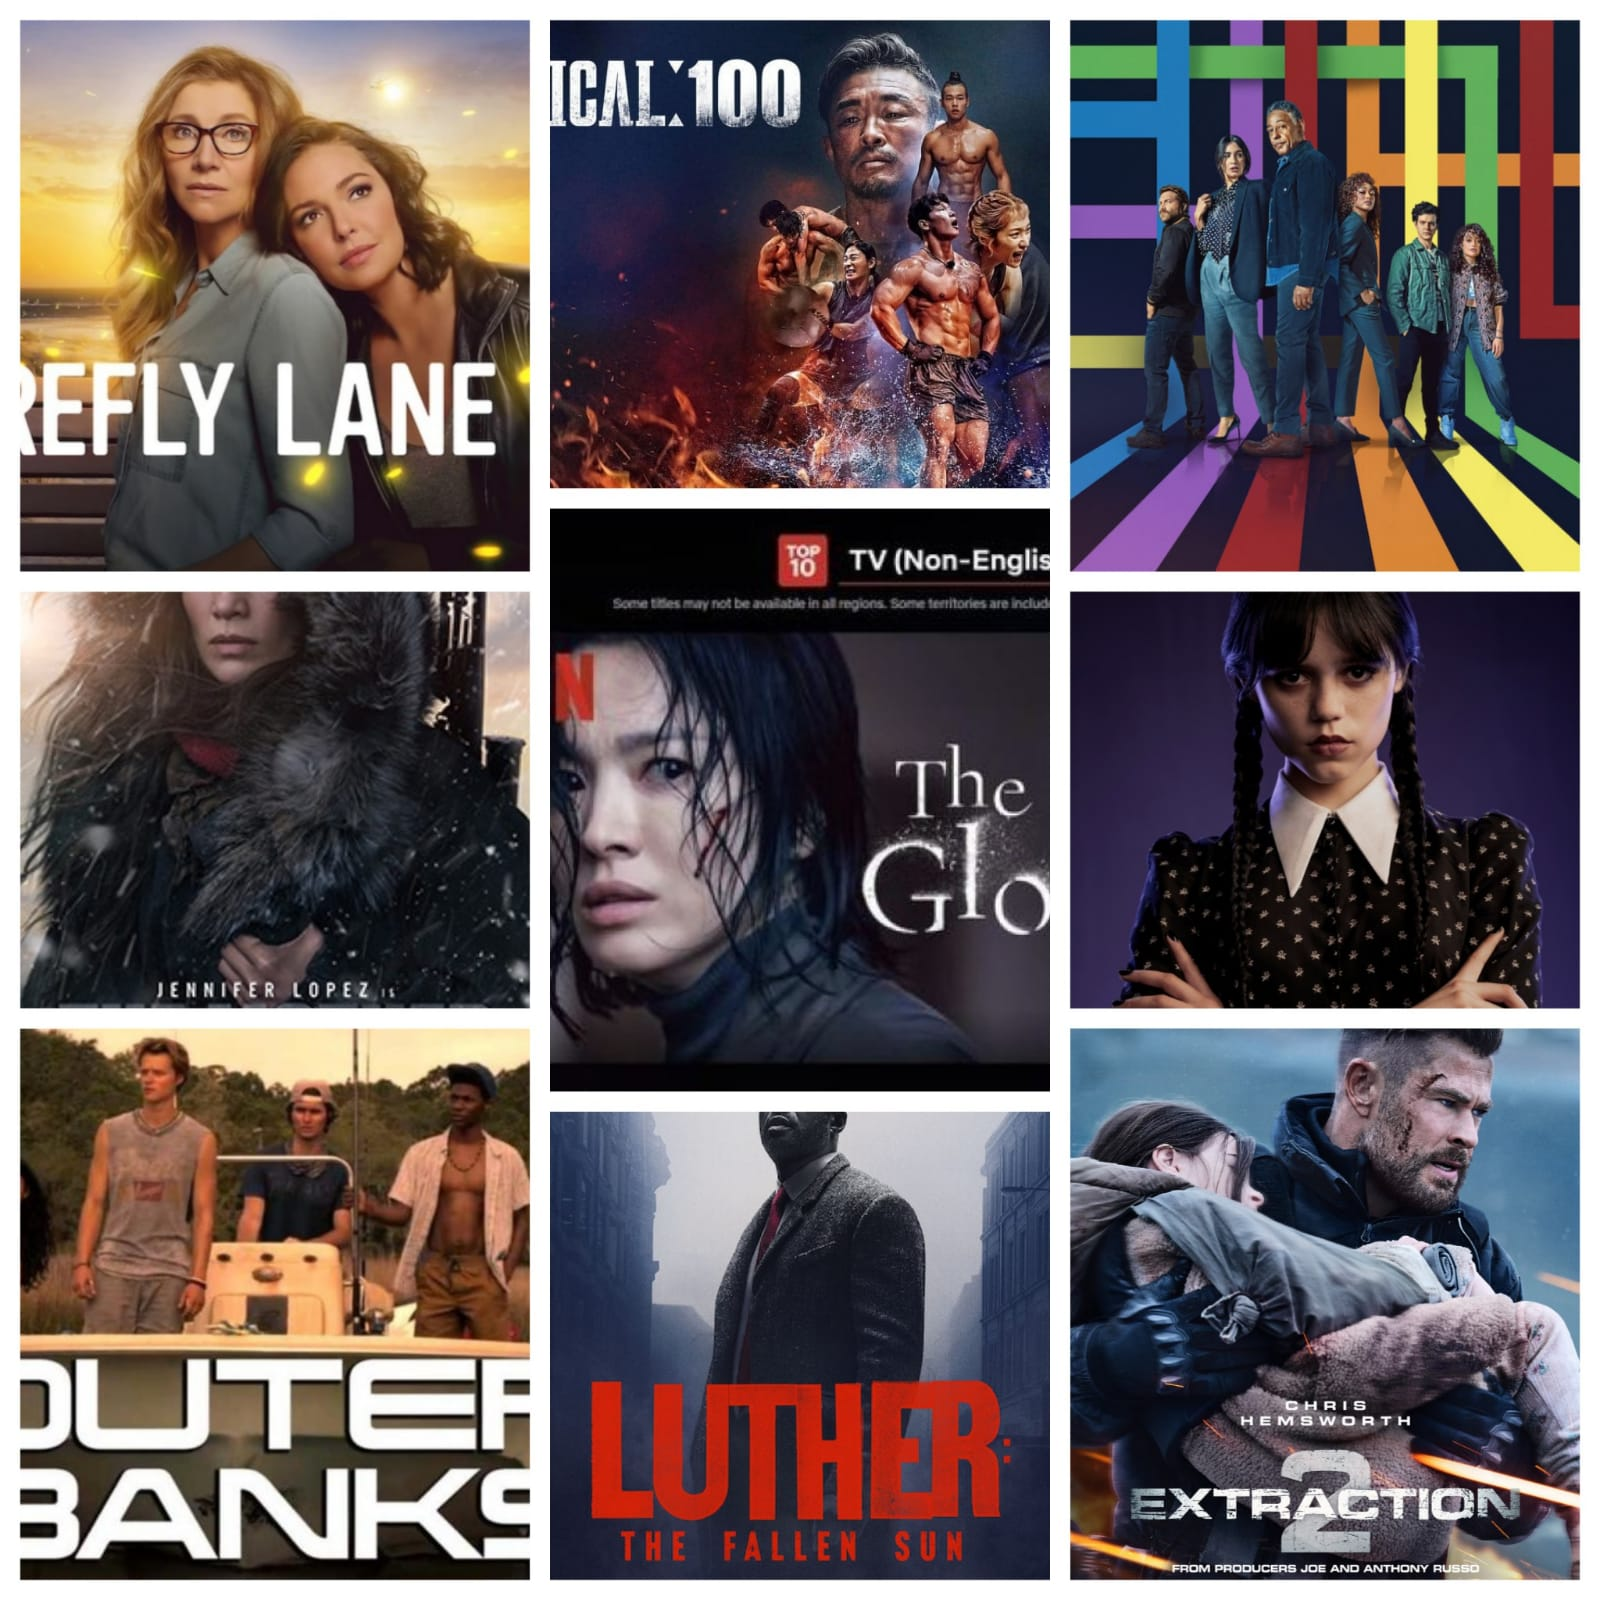

# **Dataset Overview**
The dataset contains information about movies and TV shows, including their rank, title, type, premiere year, genre, and watchtime. The dataset contains 18,164 entries. For this analysis, we will focus on understanding the dataset with the Rank column as the target variable. This prediction can offer valuable insights into the factors that contribute to the popularity and success of media content.

# Below are the features explained:

1.Rank: A numerical ranking of the movies and TV shows.

2.Title: The name of the TV show or Movie

3.Type: Indicates whether the entry is a movie or a TV show.

4.Premiere: The year the movie or TV show premiered.

5.Genre: The genre of the TV show or movie (e.g., Action, Drama, Thriller,
  Fantasy, Crime).

6.Watchtime: The total watchtime in minutes.

7.Watchtime in Million: The total watchtime expressed in millions.

# **AIM :**
Through this project, I aim to gain insights into the factors that influence the popularity of media content and develop a robust predictive model for ranking movies and TV shows.

# Importing Python libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/watched_movies.csv')
df

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M
...,...,...,...,...,...,...,...
18159,18210.0,Spiritual House,TV Show,2017.0,Talk Show,"100,000",0.1M
18160,18211.0,Suite Francaise,Movie,2014.0,War,"100,000",0.1M
18161,18212.0,The Bishop's Bedroom,Movie,1977.0,Comedy,"100,000",0.1M
18162,18213.0,30 Chưa Phải Tết,Movie,2020.0,Comedy,"100,000",0.1M


In [ ]:
df.tail()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
18159,18210.0,Spiritual House,TV Show,2017.0,Talk Show,"100,000",0.1M
18160,18211.0,Suite Francaise,Movie,2014.0,War,"100,000",0.1M
18161,18212.0,The Bishop's Bedroom,Movie,1977.0,Comedy,"100,000",0.1M
18162,18213.0,30 Chưa Phải Tết,Movie,2020.0,Comedy,"100,000",0.1M
18163,18214.0,The Promised Land,Movie,2019.0,Crime,"100,000",0.1M


In [ ]:
df.shape

(18164, 7)

# **Let's examine the dataframe in detail**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  18164 non-null  float64
 1   Title                 18164 non-null  object 
 2   Type                  18164 non-null  object 
 3   Premiere              18030 non-null  float64
 4   Genre                 17984 non-null  object 
 5   Watchtime             18164 non-null  object 
 6   Watchtime in Million  18164 non-null  object 
dtypes: float64(2), object(5)
memory usage: 993.5+ KB


In [ ]:
df.describe()

,Rank,Premiere
count,18164.000000,18030.000000
mean,9126.719335,2014.188297
std,5252.511432,8.844017
min,1.000000,1940.000000
25%,4591.750000,2012.000000
50%,9132.500000,2017.000000
75%,13673.250000,2020.000000
max,18214.000000,2023.000000


In [ ]:
df.describe(include='object')

,Title,Type,Genre,Watchtime,Watchtime in Million
count,18164,18164,17984,18164,18164
unique,14509,2,28,710,710
top,One Piece,Movie,Comedy,"100,000",0.1M
freq,35,10880,3946,3811,3811


In [ ]:
df.dtypes

Rank                    float64
Title                    object
Type                     object
Premiere                float64
Genre                    object
Watchtime                object
Watchtime in Million     object
dtype: object

In [ ]:
df.columns

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

In [ ]:
df.nunique()

Rank                    18164
Title                   14509
Type                        2
Premiere                   73
Genre                      28
Watchtime                 710
Watchtime in Million      710
dtype: int64

In [ ]:
df['Title'].unique()

array(['The Night Agent', 'Ginny & Georgia', 'The Glory', ...,
       "The Bishop's Bedroom", '30 Chưa Phải Tết', 'The Promised Land'],
      dtype=object)

In [ ]:
df['Genre'].unique()

array(['Action', 'Drama', 'Thriller', 'Fantasy', 'Crime', 'Reality-Show',
       'Comedy', 'History', 'Superhero', 'Animation', 'Science Fiction',
       'Horror', 'Adventure', 'Documentary', 'War', 'Musical', nan,
       'Romance', 'Family', 'Stand-Up', 'Western', 'Sports', 'Biography',
       'Talk Show', 'Game-Show', 'Broadcast', 'Concerts', 'News',
       'Fairy Tale'], dtype=object)

In [ ]:
df['Type'].value_counts()

Type
Movie      10880
TV Show     7284
Name: count, dtype: int64

In [ ]:
df['Premiere'].unique()

array([2023., 2021., 2022., 2018., 2011., 2020., 2012., 2013., 2010.,
       2016., 2003., 2019., 2008., 2017., 2000., 2004., 2015., 2014.,
       2009., 1996., 2005., 1994., 2007., 2001., 1989., 1997., 2006.,
       2002., 1993.,   nan, 1999., 1995., 1972., 1983., 1978., 1998.,
       1974., 1986., 1988., 1991., 1976., 1985., 1987., 1992., 1977.,
       1990., 1979., 1973., 1982., 1966., 1984., 1980., 1975., 1940.,
       1963., 1970., 1981., 1964., 1960., 1971., 1968., 1969., 1962.,
       1954., 1961., 1953., 1957., 1956., 1958., 1965., 1951., 1955.,
       1967., 1952.])

In [ ]:
df['Watchtime'].unique()

array(['812,100,000', '665,100,000', '622,800,000', '507,700,000',
       '503,000,000', '440,600,000', '429,600,000', '402,500,000',
       '302,100,000', '266,200,000', '262,600,000', '252,500,000',
       '251,500,000', '249,900,000', '235,000,000', '234,800,000',
       '229,700,000', '221,100,000', '214,100,000', '209,700,000',
       '206,500,000', '205,500,000', '201,800,000', '200,700,000',
       '194,700,000', '192,900,000', '184,000,000', '182,300,000',
       '181,800,000', '176,800,000', '175,500,000', '174,300,000',
       '173,600,000', '172,400,000', '170,100,000', '168,300,000',
       '163,000,000', '162,000,000', '161,100,000', '157,600,000',
       '155,300,000', '153,900,000', '153,000,000', '152,100,000',
       '151,500,000', '151,400,000', '150,200,000', '149,300,000',
       '148,600,000', '146,900,000', '146,700,000', '142,900,000',
       '140,100,000', '139,900,000', '139,300,000', '136,800,000',
       '136,600,000', '136,200,000', '135,900,000', '134,800,0

# Data Preprocessing

# Handle Missing Values

In [ ]:
df.isna().sum()

Rank                      0
Title                     0
Type                      0
Premiere                134
Genre                   180
Watchtime                 0
Watchtime in Million      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Rank                    0
Title                   0
Type                    0
Premiere                0
Genre                   0
Watchtime               0
Watchtime in Million    0
dtype: int64

In [ ]:
df.shape

(17879, 7)

In [ ]:
df.duplicated().sum()

0

# **Refining the data**

In [ ]:
df.rename(columns={'Watchtime in Million': 'Watchtime_in_million'}, inplace=True)

In [ ]:
# Change the data type of the 'Premiere' column to integer
df['Premiere'] = df['Premiere'].astype(int)

In [ ]:
df['Watchtime'] = pd.to_numeric(df['Watchtime'].str.replace(',', ''), errors='coerce')

In [ ]:
df['Watchtime_in_million'] = df['Watchtime_in_million'].str.replace('M', '').str.replace(',','').astype(float).astype(int)

In [ ]:
df['Watchtime_in_million'].value_counts()

Watchtime_in_million
0      9825
1      2098
2      1137
3       740
4       523
       ... 
161       1
162       1
163       1
168       1
812       1
Name: count, Length: 170, dtype: int64


# **EXPLORATORY DATA ANALYSIS**


## EDA helps in summarizing the main characteristics of the data through statistical measures and visualizations.Determine the types of variables and understand their distributions.

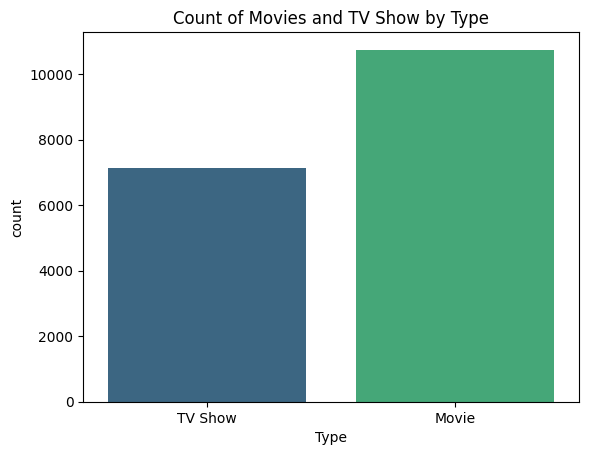

In [ ]:
sns.countplot(x='Type', data=df,palette='viridis')
plt.title('Count of Movies and TV Show by Type')
plt.show()

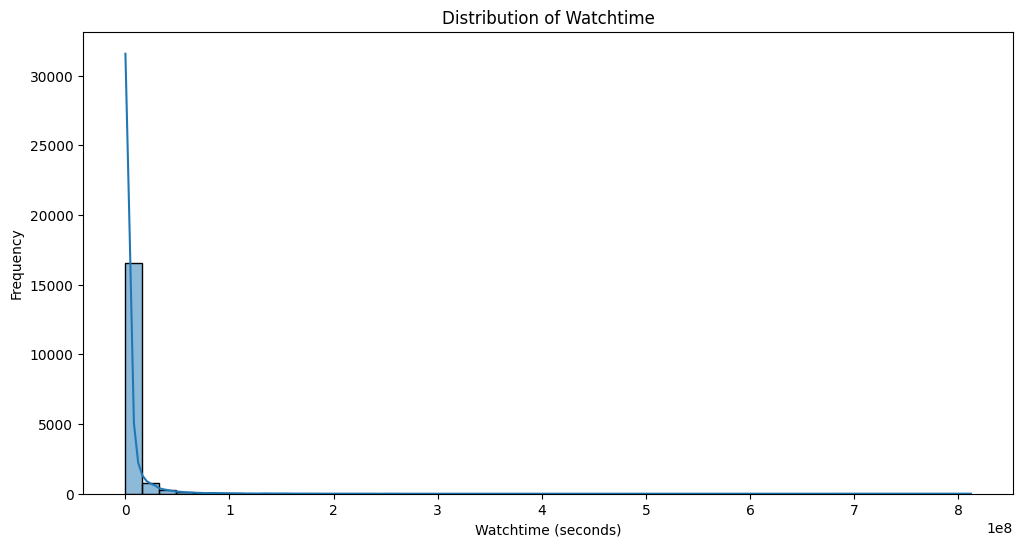

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Watchtime'], bins=50, kde=True)
plt.title('Distribution of Watchtime')
plt.xlabel('Watchtime (seconds)')
plt.ylabel('Frequency')
plt.show()

### The distribution of watchtime is skewed to the left. This means that there are more movies or TV shows with shorter watch times than there are with longer watch times.

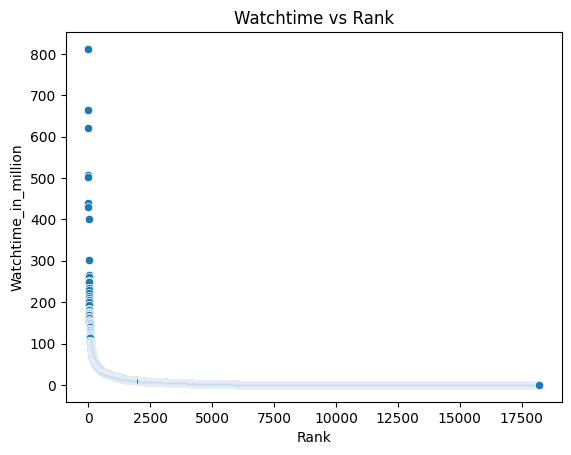

In [ ]:
sns.scatterplot(x='Rank', y='Watchtime_in_million', data=df)
plt.title('Watchtime vs Rank')
plt.show()

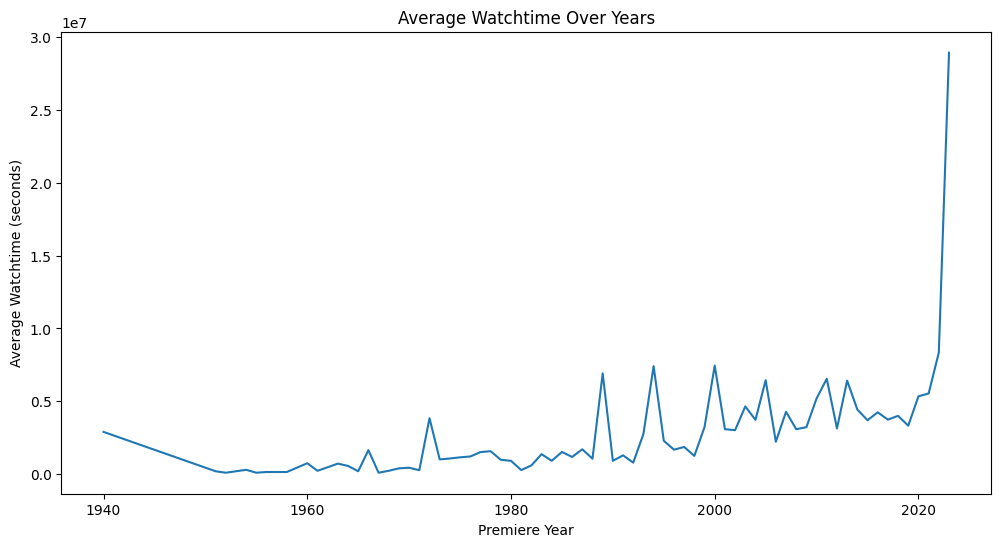

In [ ]:
average_watchtime_by_year = df.groupby('Premiere')['Watchtime'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Premiere', y='Watchtime', data=average_watchtime_by_year)
plt.title('Average Watchtime Over Years')
plt.xlabel('Premiere Year')
plt.ylabel('Average Watchtime (seconds)')
plt.show()

The line graph shows a clear upward trend. This means that the average watchtime of movies or TV shows on this streaming service has been increasing over time. There are fluctuations in the line graph, but overall it slants upwards. This suggests that people are watching longer movies or TV shows on average than they were in the past.

In [ ]:
top_type_by=df[['Rank','Title','Type']].sort_values(by='Rank',ascending= True)
top_type_by

,Rank,Title,Type
0,1.0,The Night Agent,TV Show
1,2.0,Ginny & Georgia,TV Show
2,3.0,The Glory,TV Show
3,4.0,Wednesday,TV Show
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show
...,...,...,...
18159,18210.0,Spiritual House,TV Show
18160,18211.0,Suite Francaise,Movie
18161,18212.0,The Bishop's Bedroom,Movie
18162,18213.0,30 Chưa Phải Tết,Movie


In [ ]:
top_movies=top_type_by[top_type_by['Type']=='Movie'].sort_values(by='Rank',ascending=True)[:10]
top_movies

,Rank,Title,Type
13,14.0,The Mother,Movie
19,20.0,Luther: The Fallen Sun,Movie
22,23.0,Extraction 2,Movie
28,29.0,You People,Movie
32,33.0,Murder Mystery 2,Movie
36,37.0,Your Place or Mine,Movie
51,52.0,Glass Onion: A Knives Out Mystery,Movie
68,69.0,We Have a Ghost,Movie
71,72.0,The Pale Blue Eye,Movie
73,74.0,AKA,Movie


# **Relationship between Movies and their Rank**

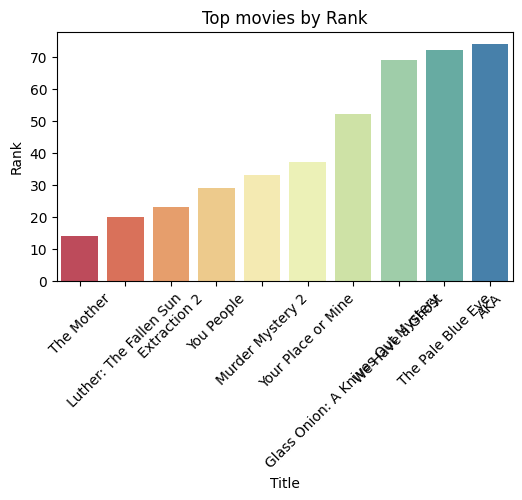

In [ ]:
# Plotting Bar graphs Top movies vs Rank
plt.figure(figsize=(20,11))
plt.subplot(3, 3, 1)
sns.barplot(top_movies,x='Title',y='Rank',palette='Spectral')
plt.title('Top movies by Rank')
plt.xticks(rotation=45)
plt.show()

The most popular movie is "The Mother", with a rank of 10.
There is a tie for second place between "Extraction 2" and "Luther: The Fallen Sun", both with a rank of 20.
The least popular movies on the list are "The Pale Blue Eye" and "Your Place or Mine", both with a rank of 70.

In [ ]:
top_TVShows=top_type_by[top_type_by['Type']=='TV Show'].sort_values(by='Rank',ascending=True)[:10]
top_TVShows

,Rank,Title,Type
0,1.0,The Night Agent,TV Show
1,2.0,Ginny & Georgia,TV Show
2,3.0,The Glory,TV Show
3,4.0,Wednesday,TV Show
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show
5,6.0,You,TV Show
6,7.0,La Reina del Sur,TV Show
7,8.0,Outer Banks,TV Show
8,9.0,Ginny & Georgia,TV Show
9,10.0,FUBAR,TV Show


# **Relationship between TV Shows and their Rank**

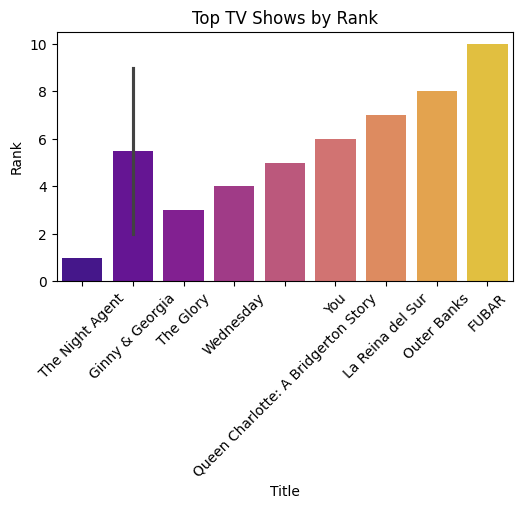

In [ ]:
plt.figure(figsize=(20,11))
plt.subplot(3, 3, 1)
sns.barplot(top_TVShows,x='Title',y='Rank',palette='plasma')
plt.title('Top TV Shows by Rank')
plt.xticks(rotation=45)
plt.show()

The most popular show is "The Night Agent", with a rank of 1.
There is a tie for second place between "Ginny & Georgia" and "The Glory", both with a rank of 4.
Less popular shows on the list include "Outer Banks" and "FUBAR", both with a rank of 10.

In [ ]:
top_genre_by_Rank=df[['Rank','Genre']].sort_values(by='Rank',ascending= True)[:10] # Sorting top 10 values
top_genre_by_Rank

,Rank,Genre
0,1.0,Action
1,2.0,Drama
2,3.0,Thriller
3,4.0,Fantasy
4,5.0,Drama
5,6.0,Crime
6,7.0,Drama
7,8.0,Drama
8,9.0,Drama
9,10.0,Action


# **Relationship between Genres and their Rank**

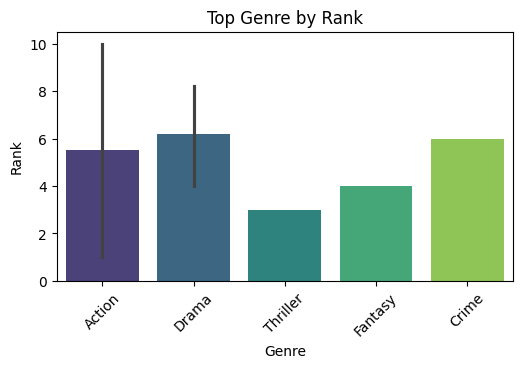

In [ ]:
#Plotting Bar graphs Top Genre vs Rank
plt.figure(figsize=(20,11))
plt.subplot(3, 3, 1)
sns.barplot(top_genre_by_Rank,x='Genre',y='Rank',palette='viridis')
plt.title('Top Genre by Rank')
plt.xticks(rotation=45)
plt.show()

The most popular genre is action, with a rank of 2.
Drama is the second most popular genre, with a rank of 3.
Thrillers, fantasy, crime, and crime fiction are also popular genres, all ranking between 4 and 6.

# Plotting the Distribution of TV Shows Across Different Genres

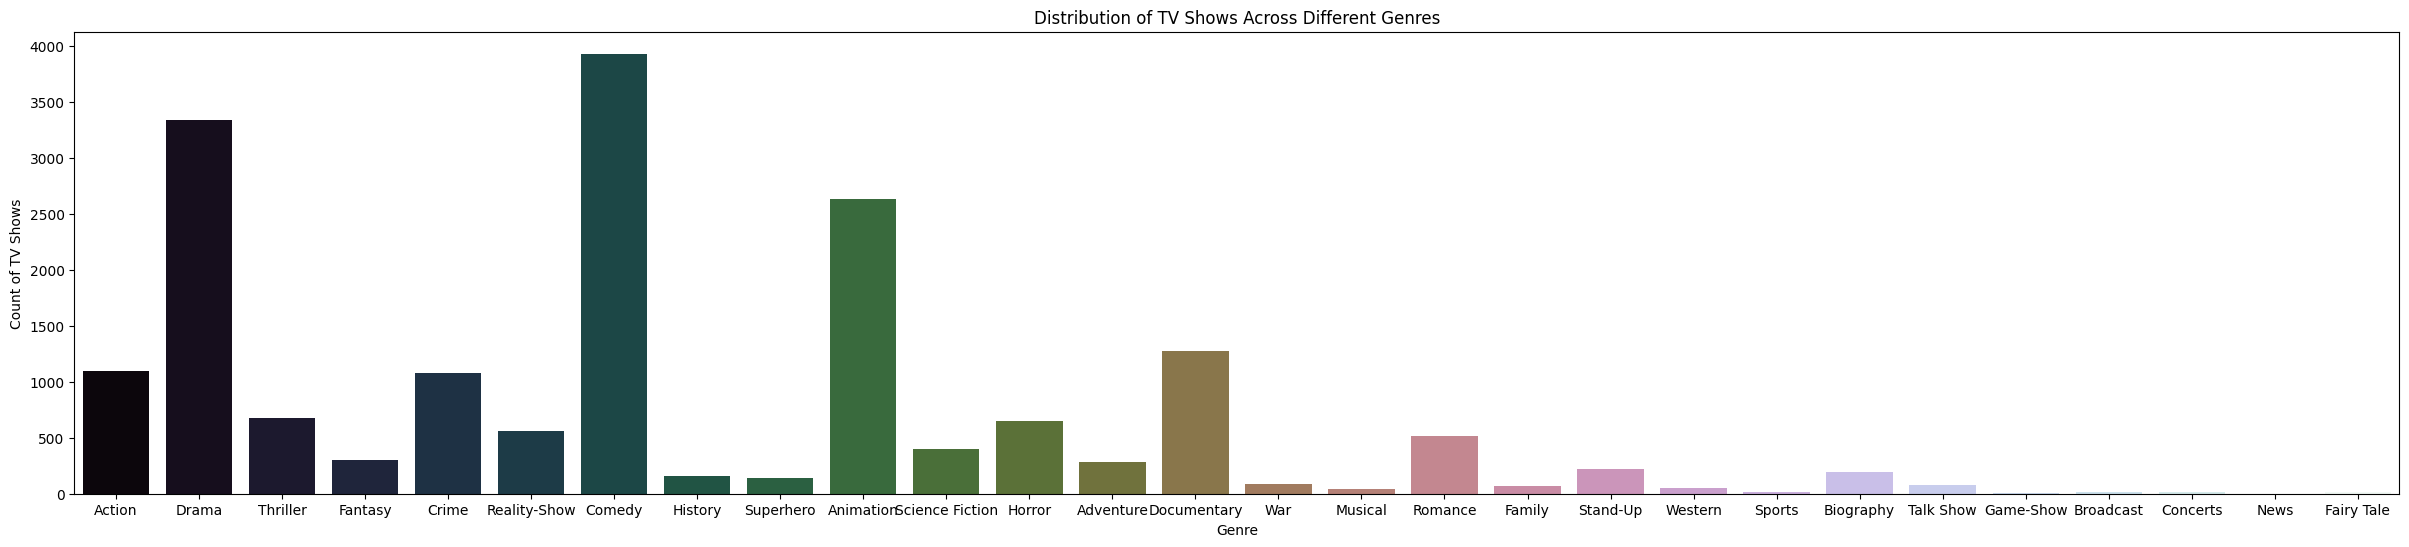

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='Genre', data=df, palette='cubehelix')
plt.title('Distribution of TV Shows Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Count of TV Shows')
plt.show()

# Total Count of Each TV Show Genre

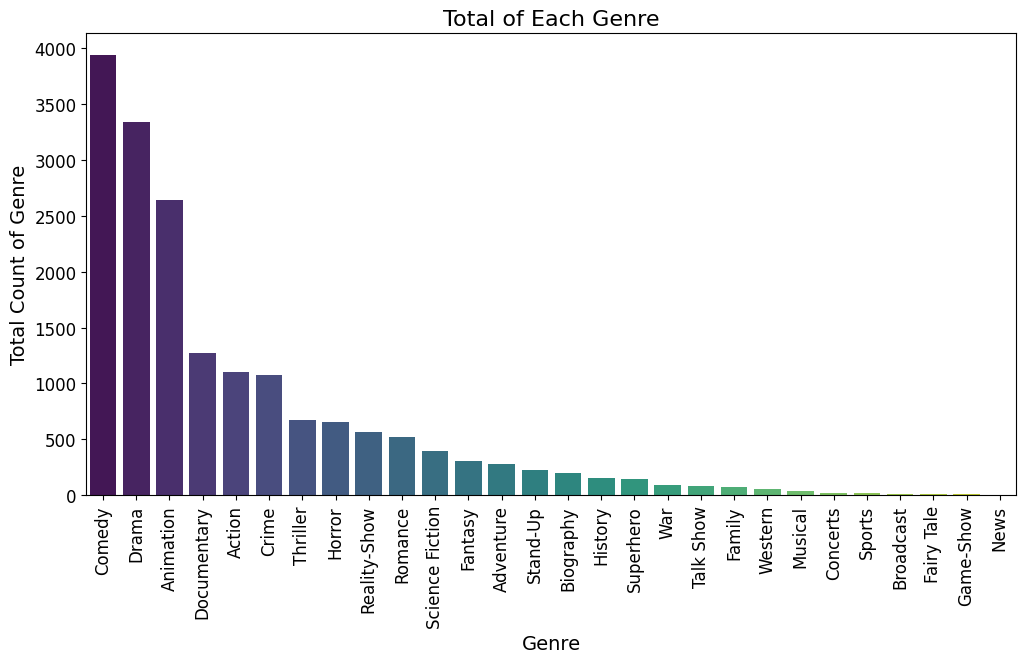

In [ ]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Total']
plt.figure(figsize=(12, 6))
plt.title("Total of Each Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Total Count of Genre", fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
sns.barplot(x='Genre', y='Total', data=genre_counts, palette='viridis')
plt.show()

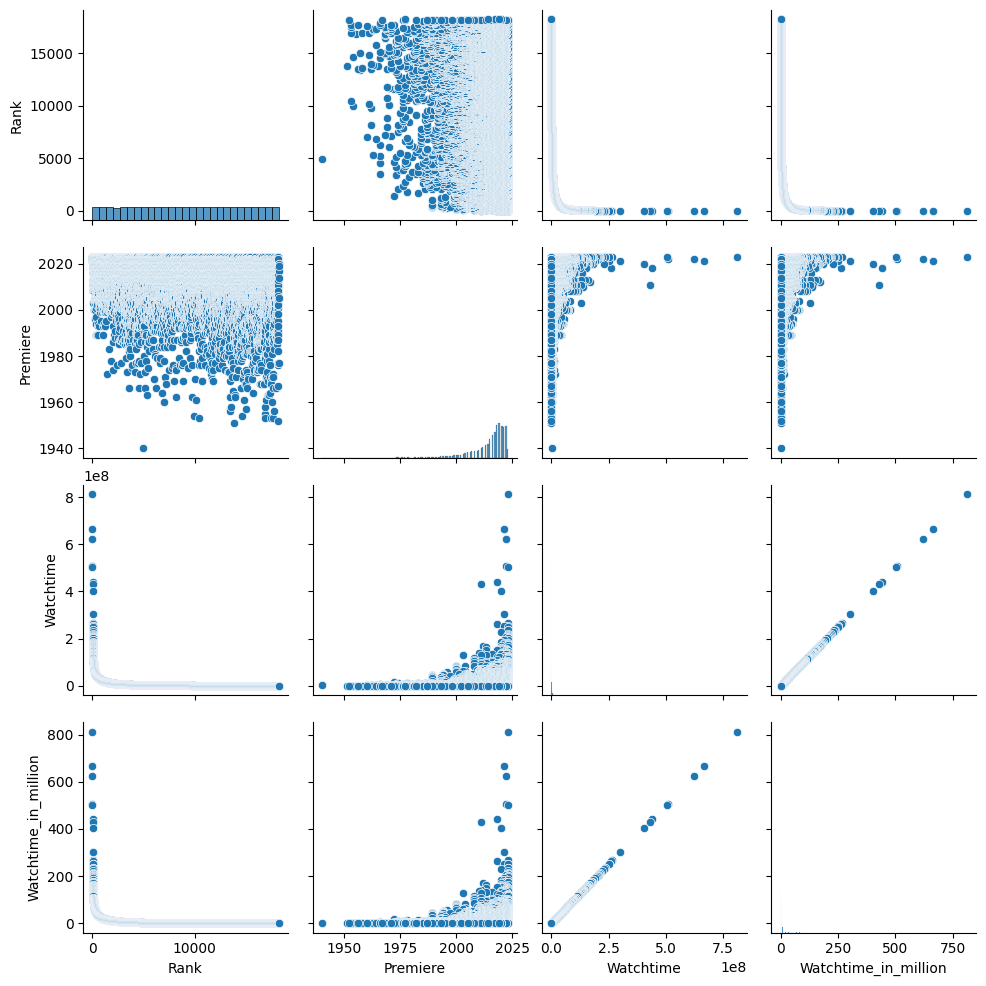

In [ ]:
sns.pairplot(df)

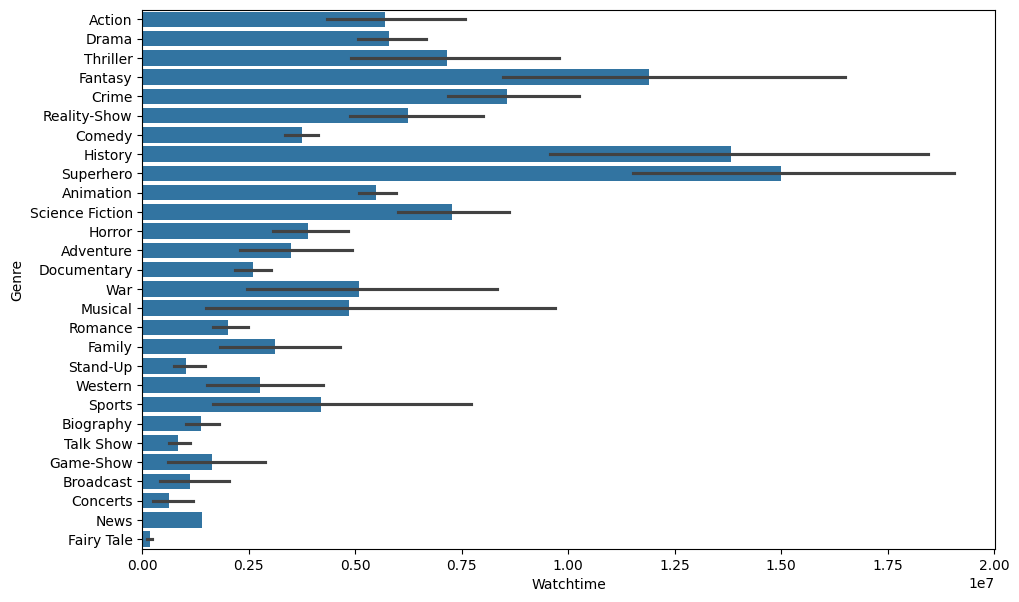

In [ ]:
plt.figure(figsize=(11,7))
sns.barplot(x='Watchtime', y='Genre',data=df)
plt.show()

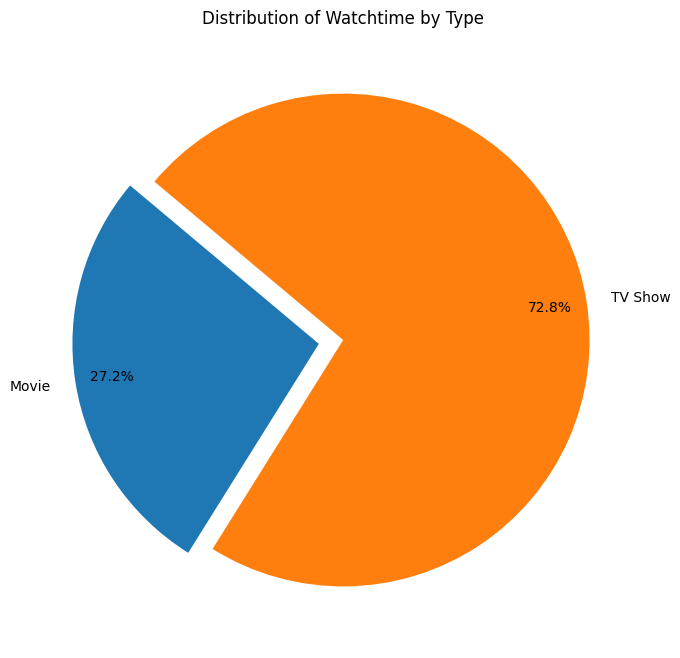

In [ ]:
# Calculate total watchtime for each Type
total_watchtime_by_genre = df.groupby('Type')['Watchtime'].sum()
# Creating pie chart
plt.figure(figsize=(10, 8))
explode = [0.1, 0]
plt.pie(total_watchtime_by_genre, labels=total_watchtime_by_genre.index,explode=explode, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Watchtime by Type')
plt.show()

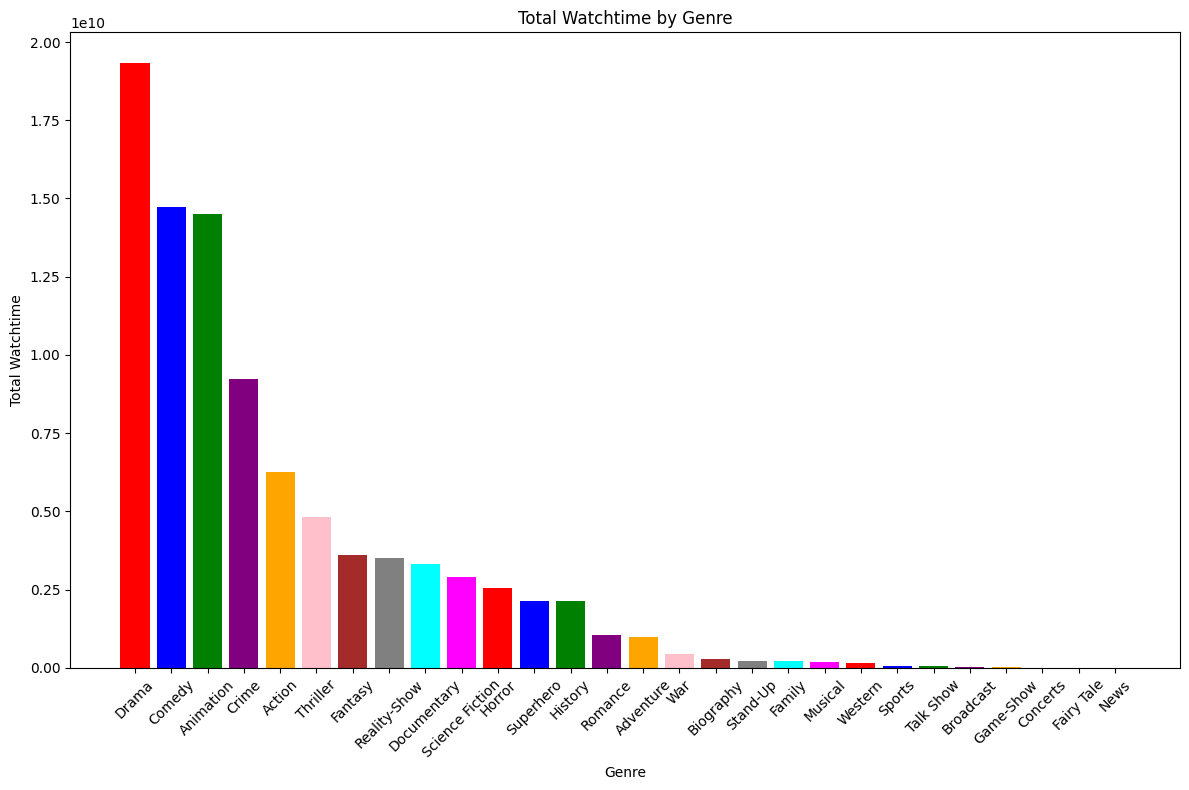

In [ ]:
# Calculate total watchtime for each genre
total_watchtime_by_genre = df.groupby('Genre')['Watchtime'].sum().sort_values(ascending=False)

# Define the colors list here
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']

# Creating bar chart
plt.figure(figsize=(12, 8))
plt.bar(total_watchtime_by_genre.index, total_watchtime_by_genre.values,color=colors)
plt.xlabel('Genre')
plt.ylabel('Total Watchtime')
plt.title('Total Watchtime by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

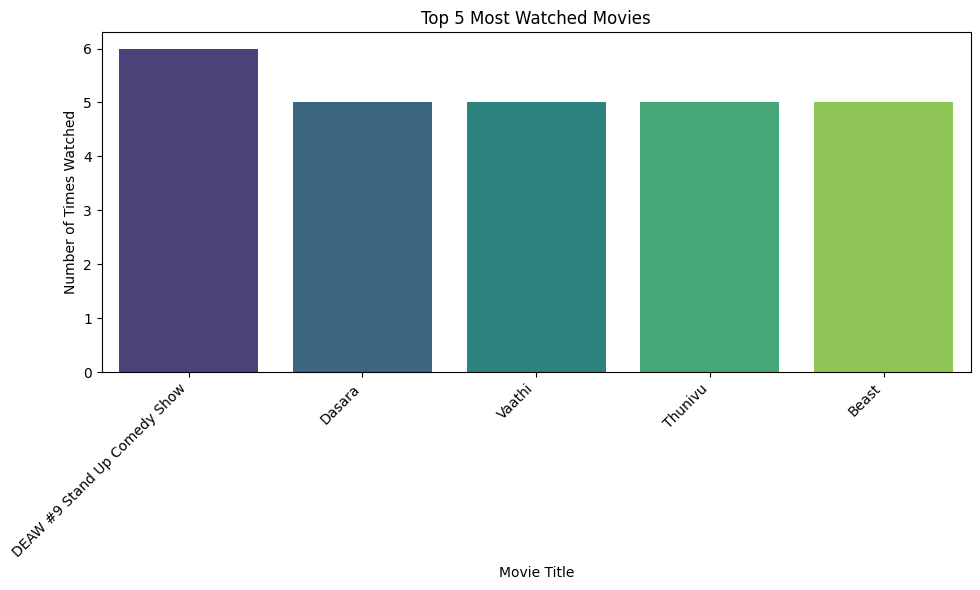

In [ ]:
# plot barplot of top 5 Movies

top_5_shows = df[df['Type']=='Movie']['Title'].value_counts().head(5) # Select only the 'Title' column

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_shows.index, y=top_5_shows.values, palette='viridis')
plt.title('Top 5 Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Times Watched')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Removing Outliers using boxplot**

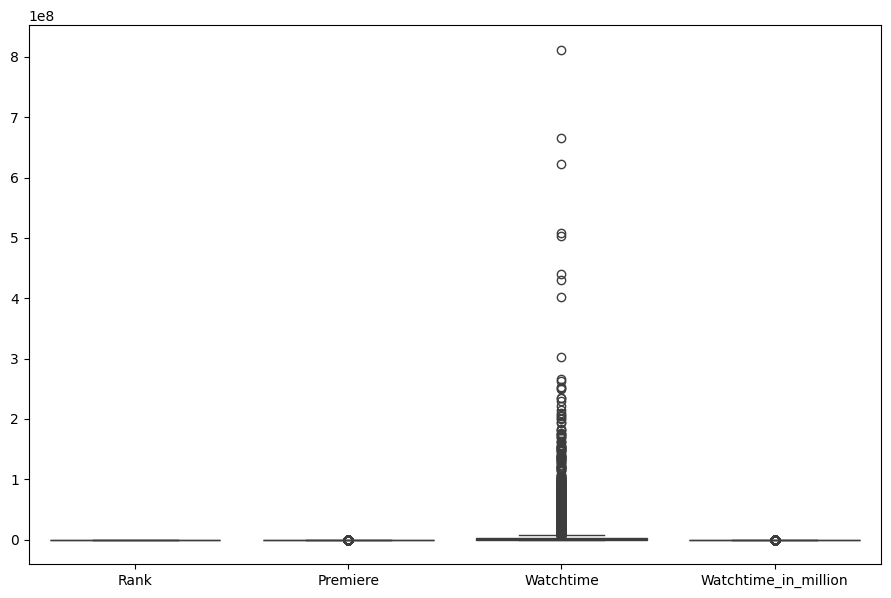

In [ ]:
plt.figure(figsize=(11,7))
sns.boxplot(data=df[['Rank','Premiere','Watchtime',
       'Watchtime_in_million']])
plt.show()

In [ ]:
lst=['Rank','Premiere','Watchtime',
       'Watchtime_in_million']
for i in lst:
  if df[i].dtype in ['int64']:
     Q1 = df[i].quantile(0.25)
     Q3 = df[i].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.shape

(12039, 7)

In [ ]:
df.dtypes

Rank                    float64
Title                    object
Type                     object
Premiere                  int64
Genre                    object
Watchtime                 int64
Watchtime_in_million      int64
dtype: object

In [ ]:
df['Type'].value_counts()

Type
Movie      8218
TV Show    3821
Name: count, dtype: int64

# **LABEL ENCODING**

In [ ]:
lst=['Type','Genre','Title']
le={}
for col in lst:
  le[col]=LabelEncoder()
  df[col]=le[col].fit_transform(df[col])
le

{'Type': LabelEncoder(), 'Genre': LabelEncoder(), 'Title': LabelEncoder()}

In [ ]:
df['Type'].value_counts()

Type
0    8218
1    3821
Name: count, dtype: int64

# **Co-relation and Heatmap**

In [ ]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime_in_million
Rank,1.000000,0.007147,-0.270939,-0.059775,0.010746,-0.868318,-0.728609
Title,0.007147,1.000000,0.016068,-0.001200,0.021895,-0.001846,0.000026
Type,-0.270939,0.016068,1.000000,0.031072,-0.078808,0.241618,0.198370
Premiere,-0.059775,-0.001200,0.031072,1.000000,0.035805,0.064455,0.058705
Genre,0.010746,0.021895,-0.078808,0.035805,1.000000,-0.006339,-0.002702
Watchtime,-0.868318,-0.001846,0.241618,0.064455,-0.006339,1.000000,0.936991
Watchtime_in_million,-0.728609,0.000026,0.198370,0.058705,-0.002702,0.936991,1.000000


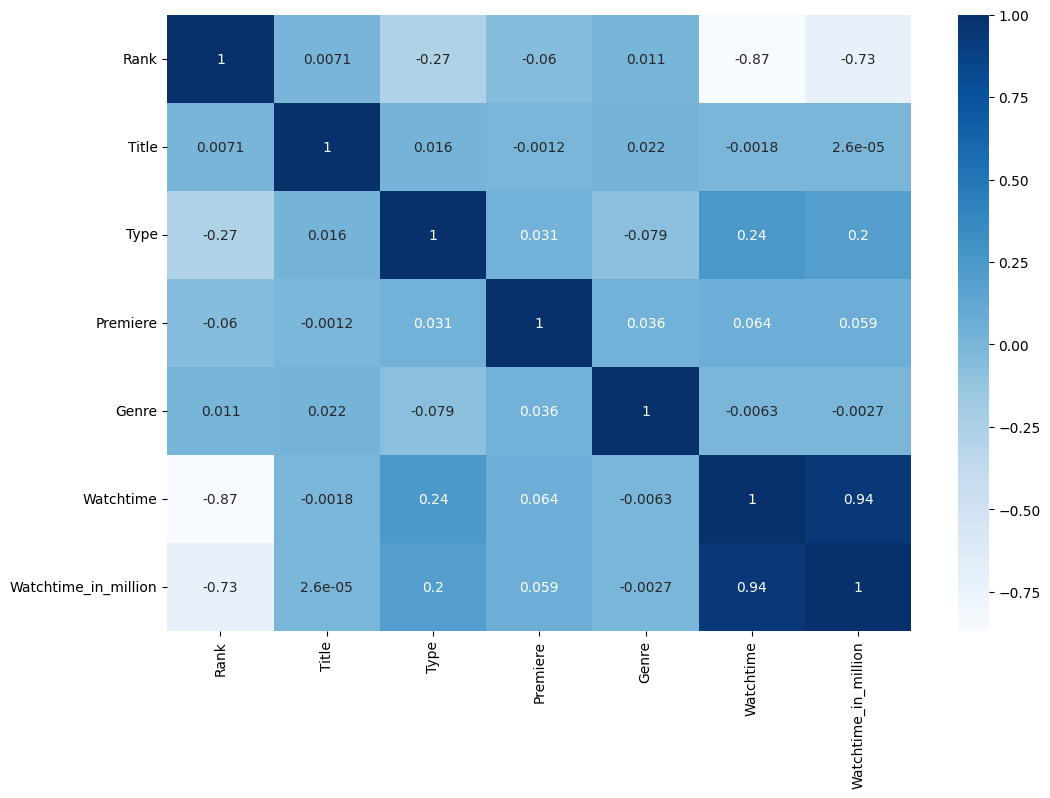

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='Blues')
plt.show()

**Watchtime_in_million** has a very strong negative correlation (-0.87) with **'Rank'**. This means that shows with a higher number of watchtime in millions tend to have a lower rank, which means they are more popular.

**Watchtime** also has a strong negative correlation (-0.73) with **'Rank'** but not quite as strong as Watchtime_in_million. This further reinforces the idea that shows with higher watch time are more popular.

There is a weak positive correlation (0.011) between **Title and 'Rank'**. This means there might be a slight tendency for shows with shorter titles to be ranked higher. However, the correlation is so weak that it may not be statistically significant.

# **Seperating Features and Target**

In [ ]:
x=df.drop(columns='Rank')
y=df['Rank']

# **FEATURE SELECTION**

**ExtraTreesRegressor** is a type of ensemble learning algorithm that is used for regression tasks. Using ExtraTreesRegressor for feature selection provides a data-driven approach to identify and retain only the most influential features, thereby enhancing the overall modeling process. The importance scores derived from this model help identify which features contribute the most to predicting the target variable.

[0.01752212 0.00376984 0.005182   0.65747711 0.31604893]


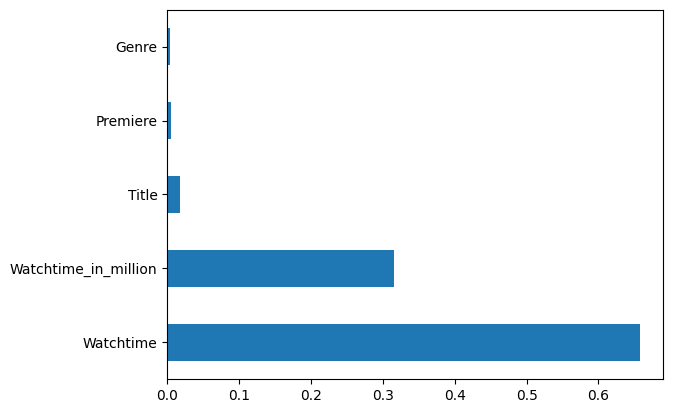

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
x=df[['Title', 'Genre', 'Premiere', 'Watchtime', 'Watchtime_in_million']]
y=df['Rank']

# **SPLITTING DATA INTO TRAINING AND TESTING**

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print("Train Shape :", x_train.shape, "--------- Test Shape :", x_test.shape)

Train Shape : (8427, 5) --------- Test Shape : (3612, 5)


# **MODEL SELECTION AND MODEL TRAINING**

In [ ]:
# Define models
lr=LinearRegression()
decision=DecisionTreeRegressor()
rf=RandomForestRegressor(random_state=1)
gbr=GradientBoostingRegressor()
models = {
    "Linear Regression": lr,
    "Decision Tree": decision,
    "Random Forest": rf,
    "Gradient Boosting": gbr

}

In [ ]:
# Define hyperparameters for each model
parameters= {"Linear Regression": {},
    "Decision Tree": {'max_depth': [3,5,7,10,15],'min_samples_split': [2, 5, 10],'max_depth': [None, 5, 10, 15],'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'n_estimators': [50,100], 'max_depth': [3,5,7,10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'bootstrap': [True, False]},"AdaBoost": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]},
    "Gradient Boosting": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}}


In [ ]:
# Hyperparameter tuning and training
best_params = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, parameters[model_name], cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_params[model_name] = grid_search.best_params_
    print("Best Parameters:", best_params[model_name])

Tuning hyperparameters for Linear Regression...
Best Parameters: {}
Tuning hyperparameters for Decision Tree...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuning hyperparameters for Random Forest...
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Tuning hyperparameters for Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [ ]:
model1=[lr,decision,rf,gbr]
for model in model1:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
  print('Mean squared error:',mean_squared_error(y_test,y_pred))
  print('RMSE:',np.sqrt((mean_squared_error(y_test,y_pred))))
  print('R2score:',r2_score(y_test,y_pred))
  print('------------------------------------------------------------------')

LinearRegression()
Mean absolute error: 1320.1901315080377
Mean squared error: 2765467.9846232035
RMSE: 1662.9696282924724
R2score: 0.8107870875741027
------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error: 293.49215116279066
Mean squared error: 466524.4782231297
RMSE: 683.0259718510927
R2score: 0.9680804638732429
------------------------------------------------------------------
RandomForestRegressor(random_state=1)
Mean absolute error: 264.8322499495321
Mean squared error: 249442.50878139204
RMSE: 499.4421976379169
R2score: 0.9829331802675776
------------------------------------------------------------------
GradientBoostingRegressor()
Mean absolute error: 378.11112548995584
Mean squared error: 357143.8709039146
RMSE: 597.6151528399482
R2score: 0.9755642689249951
------------------------------------------------------------------


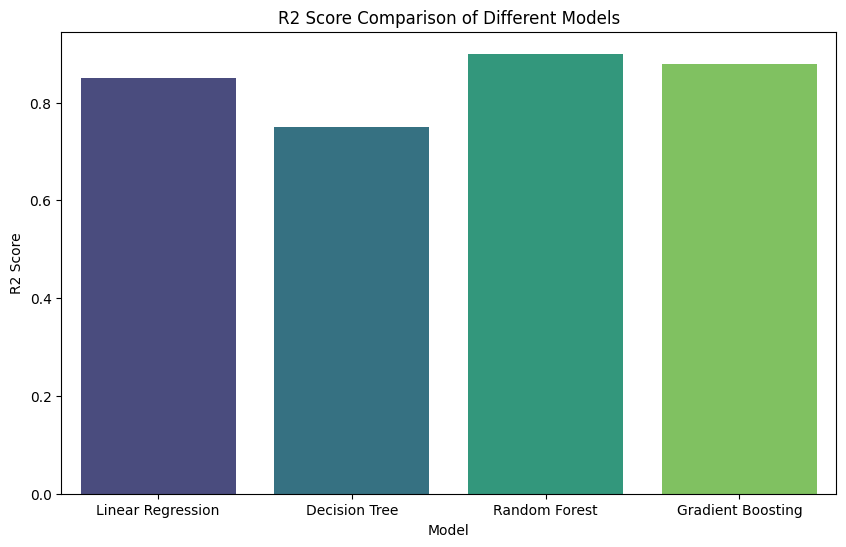

In [ ]:
#diagram for r2 score of different model

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.85, 0.75, 0.90, 0.88]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores, palette='viridis')
plt.title('R2 Score Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()


# **DATA DEPLOYMENT**

In [ ]:
def prediction_value(Title,Premiere,Genre,Watchtime,
       Watchtime_in_million):
  Title=le['Title'].transform([Title])[0]
  #Type=le['Type'].transform([Type])[0]
  Genre=le['Genre'].transform([Genre])[0]
  input_data = [[Title,Genre,Premiere,Watchtime,Watchtime_in_million]]
  prediction = rf.predict(input_data)[0]
  return prediction
# prediction = prediction_value(Title="Sherlock Holmes",Type="TV Show",Premiere=2009,Watchtime=458,
#        Watchtime_in_million=38)
# print(prediction)
prediction = prediction_value(Title="Friday Night Lights",Premiere=2004,Genre="Drama",
                              Watchtime=2900000,Watchtime_in_million=2)
print(np.floor(prediction))

4912.0


# **BEST MODEL**

# Model Name : RandomForestRegressor

# R2 Score : 0.9829331802675776